# Lab 1 - Concept of a Cell and its Coverage
<p style='text-align: justify;'> This lab consists of the very basic concepts in the cellular mobile networks covering the design, deployment and coverage patterns of cells. The cells form the basis of a cellular radio network with efficiently planned coverage regions with an aim to cover the pre-determined area and provisioning of optimal performance objectives to cellular users. In simpler words, the relative location of a cellular user with respect to the base station should impact as little as possible on the level of service it expects and receives from the network provider. To this end, we intend to cover the following concepts in this lab:</p>

- Cellular Regions (Center, Edge, Out of Coverage)
- Cellular Coverage Patterns (Sectors)
- Associated channel, propagation and losses (SINR)

The scope of this lab is roughly related to <strong>Section 1.7.2</strong> (Page. 26) in the textbook. However, knowledge about GPRS is required for different tasks in this lab.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Part 1: Getting Used to a Cellular Environment
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Introduction

<p style='text-align: justify;'> The concept of a cell can simply be described as the bounded region around the signal transmitter (base station) where the communication is possible for the connected users with the cellular network infrastructure via radio links. There can be different coverage patterns for a cell however, a directed coverage consisting of multiple sectors is the most common model for maximizing the reach and availability of access signal for users across the coverage area. The sectored coverage model with directional access and non-sectored omni directional model with an equal coverage in all directions is presented in <b>Figure 1(a)</b> and <b>(b)</b> respectively.<br>
Moreover, users are placed in different locations and relative distances to the transmitting base station. This will have an impact on the received signal power at the user devices depending on the relative distance. Intuitively, the further the user is from the base station, the weaker the signal will get upon its reception. The signal as depicted in Figure 1 shows a stronger strength for warmer colors (yellowish red) and weaker strength for colder colors (blueish purple). In this lab, we intend to explore this behavior by changing the placement of users with respect to the base station.  </p>

| |
|---|
| 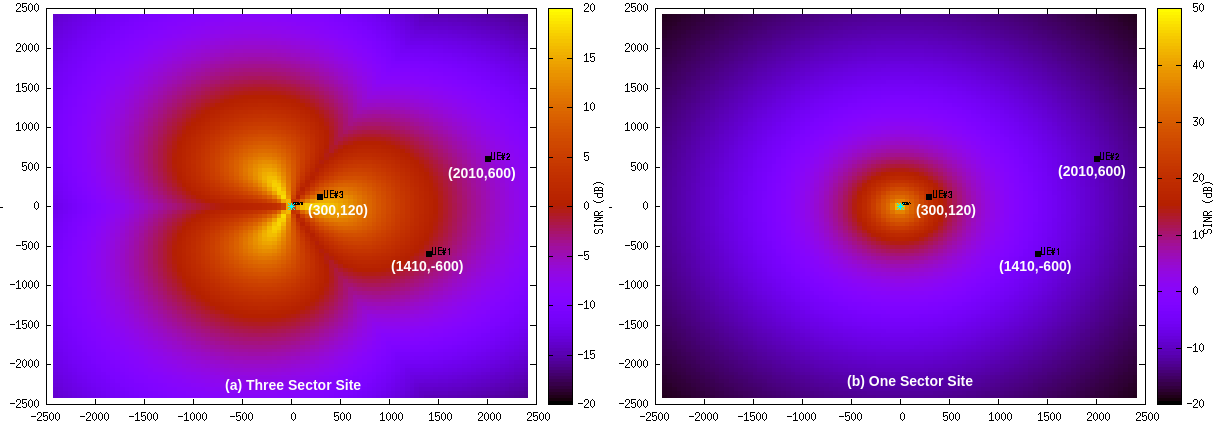 |

<p style="text-align: center;"><b>Figure. 1: Radio coverage behavior (a) 3-Sector Cell, (b) 1-Sector Cell.</b></p>
<br>

### 1.1 Cellular Regions
#### 1.1.1 Cell Center
<p style='text-align: justify;'>This region of the cell, immediately next to the transmitter, is the center region with the strongest coverage as shown in Figure 1. The users in this region are expected to receive best possible service in terms of received signal strength, call quality and maximum achievable data rate.</p>

#### 1.1.2 Cell Edge
<p style='text-align: justify;'>This region of the cell is immediately next to the coverage boundary but still gets sufficient coverage from the transmitter at base station. This regions receives less signal strength in comparison to the center region of the cell as shown in Figure 1. The users in this region are expected to receive average (or below average) service in terms of received signal strength, call quality and maximum achievable data rate.</p>

#### 1.1.3 No Coverage
<p style='text-align: justify;'>This region in the cell is where no service is expected to be delivered and the connection of a user with the base station becomes infeasible due to extremely low signal strength. The coldest regions (blueish purple) are the no-coverage regions as shown in Figure 1.</p><br>

### 1.2 Cellular Parameter
In this lab, we will consider a set of parameters for evaluating the performance of a cellular environment. The designed tasks intend to explore these parameters and their impact on the performance parameters.

- <b>Transmit Power of Base Station</b>
- <b> Coverage Model</b>

<br>

### 1.3 Performance Measurement Parameters
<p style='text-align: justify;'> We will observe 3 parameters to measure the performance of the received signal at the users during the simulation. These are stated below in Table 1 along with their respective ranges for reference.</p> 


| Connectivity | Signal Power (dBm) | Signal Quality (dB) | SINR (dB) |
|--------------|--------------------|---------------------|-----------|
| <code style="background:lime;color:black">Excellent</code>    | <code style="background:lime;color:black">>= -80 </code>            | <code style="background:lime;color:black">>= -10 </code>              | <code style="background:lime;color:black">>= 20 </code>     |
| <code style="background:lightsalmon;color:black">Good</code>          | <code style="background:lightsalmon;color:black">-80 to -90</code>         | <code style="background:lightsalmon;color:black">-10 to -15</code>          | <code style="background:lightsalmon;color:black">13 to 20</code>  |
| <code style="background:coral;color:black">Medium</code>       | <code style="background:coral;color:black">-90 to -100</code>        | <code style="background:coral;color:black">-15 to -20</code>          | <code style="background:coral;color:black">0 to 13</code>   |
| <code style="background:black;color:white">Weak</code>         | <code style="background:black;color:white"><= -100</code>            | <code style="background:black;color:white">< -20</code>               | <code style="background:black;color:white"><= 0</code>      |
<p style="text-align: center;"><b>Table. 1: Reference connectivity state for different ranges.</b></p>

<b>Note:</b> The values for these parameters are negative and mathematically -70dBm is considered better than -80dBm.<br>

## 2. Example Cellular Topology
<p style='text-align: justify;'>In this example scenario, we utilize the topology shown in <b>Figure 2</b> (or Figure 1b) to simulate the cellular network for 3 users within the coverage of a single cell with uniform distribution of signal in all directions. We utilize a distance dependent signal propagation model in the wireless radio channel to model signal propagation and reception losses for different users. The signal strength received at the user terminals is dependent on the initial transmit power selected at the transmitter installed at the base station.</p> 

| |
|---|
| 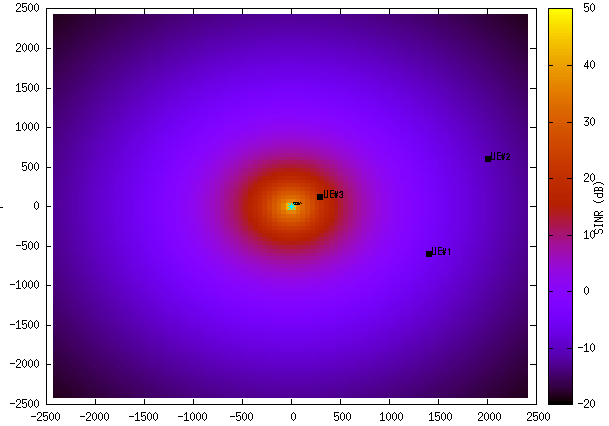 |
<p style="text-align: center;"><b>Figure. 2: A single transmitter at the cell center (eNB Transmit Power = 40dB). </b></p>
<br>

### Step 1: Running the simulation
This python script is designed to execute the underlying ns3 simulation in order to instantiate, simulate and collect results in this jupyter notebook interface. The script requires the following inputs from the user in order to configure the parameters specified in <b> Section 1.2</b>. 

- **Sectors** (<u>yes</u> for having sectors & <u>no</u> for having omni directional eNB transmitters)
- **eNB transmit power** (should be between 15 and 45 dBm)

<b>Note:</b> During first execution of the python script, ns3 builds its libraries which can take a long time (should not be more than 10mins) based on resource availability. In comparison, for each subsequent run, the process should be fairly quick. 

In [ ]:
%run -i 'Modules/lab1-init.py'

After the successful completion of ns3 simulation, a series of variables are made available to the notebook to be utilized for evaluation of the obtained results. The results are extracted using the step 2. 

### Step 2: Querying relevant simulation results
This step involves the search and retrieval of the relevant results as dictated by the parameter variable. The queried results can be displayed using the <b>display(variable_name)</b> command in python.

In [ ]:
params_signalpower = {
    'enablesignalpower': True,
    'enableSectors': sectors,
    'bsTxPower': txpower,
    'runId': runid,
}

params_sinr = {
    'enablesinr': True,
    'enableSectors': sectors,
    'bsTxPower': txpower,
    'runId': runid,
}

result_signalpower = campaign.db.get_complete_results(params=params_signalpower)
result_sinr = campaign1.db.get_complete_results(params=params_sinr)

print("There are %s results in the database\n" % len(list(result_signalpower)))
print("There are %s results in the database\n" % len(list(result_sinr)))

The results will be available in the following variables for further processing after completion of a ns3 simulation, 
- **result_signalpower** provides information regarding received signal power and signal quality for cellular users. 
- **result_sinr** provides information regarding received signal power and interference experienced by the cellular users. 
- **result_throughput** provides information regarding averaged user throughput in downlink and uplink for cellular users.

In addition, we also have the <b>campaign</b> variables which are from the <b>lab1-init.py</b> containing the simulation objects for the ns3 simulations. We use them here to obtain the results using the simulation objects. 

In [ ]:
display(result_signalpower)

The variables As visible from the output, pre-processing is required in order to make it presentable and for visualization in jupyter notebook. Hence, a python script is designed to perform this task in <b>Step 3</b>. 

### Step 3: Pre-processing simulation results
<p style='text-align: justify;'>The results obtained from ns3 require some pre-processing and cleaning in order to perform visualization on the data. This is implemented in the <b>lab1-dataPre.py</b> script. The results for the received signal parameters are available in variables after execution of this script (i.e. <b>res_signalpower</b> and <b>res_sinr</b> for signal quality and sinr respectively).</p>

In [ ]:
%run -i 'Modules/lab1-dataPre.py'
# dataframes for visualizing respective results
# res_signalpower for RSRP and RSRQ
# res_sinr for SINR

It is expected that the data will be cleaner from our previous premise. This can be verified by displaying samples from the signal power and sinr variables. As shown in Lab0, dataframes provide flexible querying of different data fields. This has been utilized to analyze the some data samples after data cleaning for user 11. This approach can be extended for other users as well by extracting their user id from the simulation results. 

In [ ]:
display(res_signalpower.head())
display(res_sinr.head())

### Step 4: Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this with the results variables we extracted in Step 3.

In [ ]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(40,10))
snsp1 = sns.lineplot(ax=axes[0], data=res_signalpower, x='time', y='sig_power', hue='uid', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp2 = sns.lineplot(ax=axes[1], data=res_signalpower, x='time', y='sig_quality', hue='uid', errorbar=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp3 =  sns.lineplot(ax=axes[2],data=res_sinr, x='time', y='sinr', hue='uid', errorbar=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')

plt.show()

## <span style="color:red"> *Task#1: Reviewing the Sample Topology* </span>

### Exercises

#### Q1: Identify the user id and location of the users (User 1,2,3) as being center, edge or out of coverage for the given topology in Figure 2?
<b>Hint</b>: Use Table 1 as reference and refer to the coordinate location of users in Figure 1.

#### Q2: Will there be an impact on the performance of the users in the different cellular regions? Explain with reference to the performance measurements and simulation results?

#### Q3: While accessing the network, authentication is performed for users. Why is there a need to get users authenticated in a cellular network?

#### Q4: Which of the users (User 1,2,3) would not obtain authentication from the cellular network?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Part 2: Exploring the concept of Sectors in a Cell
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <span style="color:red"> *Task#2: Coverage in a Sectored Cell*</span>
<p style='text-align: justify;'>In deployed cellular networks, omni directional (or single sector cell) with uniform coverage across all directions are rarely utilized. The reason for this is the inefficient radiation of power in all directions. Moreover, the cellular user capacity requires sectored planning of the topologies in order to enhance the total number of serviced users. This sector design is achieved through various mechanisms along with the utilization of directional antennas with techniques such as electrical and mechanical tilting to focus radiated signal in a particular direction. A typical coverage comparison of a directional and omni-directional antenna is shown in <b>Figure 3</b>.</p>

| |
|---|
| 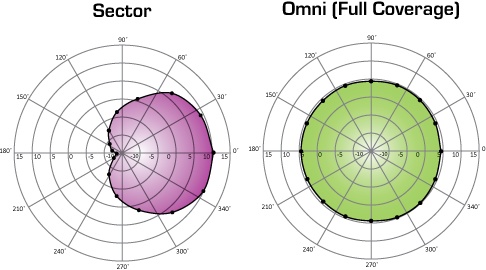 |

<p style="text-align: center;"><b>Figure. 3: Antenna coverage of a sectored and omni cell.</b></p>

In this task, the simulation scenario will focus on a topology as shown in <b>Figure 4</b> with 3-sectors and serving 3-users in one sector. The location for the users has been kept constant in order to provide a baseline comparison between single and multiple sector cells. 

| |
|---|
| 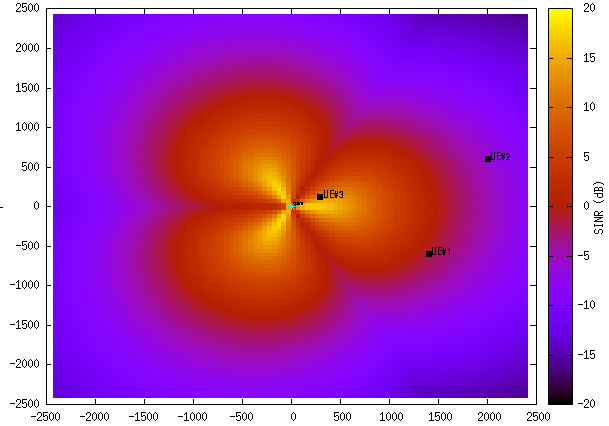 |

<p style="text-align: center;"><b>Figure. 4: A 3-sector cell (eNB Transmit Power = 40dB).</b></p>

The steps for running the simulation are shown as follows:

### Step 1: Running the simulation script
This python script is designed to execute the underlying ns3 simulation in order to instantiate, simulate and collect results in this jupyter notebook interface. The script requires the following inputs from the user in order to configure the parameters specified in <b> Section 1.2</b>:

- **Sectors** (<u>yes</u> for having sectors & <u>no</u> for having omni directional eNB transmitters)
- **eNB transmit power** (should be between 15 and 45 dBm)

<b>Note:</b> During first execution of the python script, ns3 builds its libraries which can take a long time (should not be more than 10mins) based on resource availability. In comparison, for each subsequent run, the process should be fairly quick. 

In [ ]:
%run -i 'Modules/lab1-init.py'

After the successful completion of ns3 simulation, a series of variables are made available to the notebook to be utilized for evaluation of the obtained results. The results are extracted using the step 2. 

### Step 2: Querying relevant simulation results
This step involves the search and retrieval of the relevant results as dictated by the parameter variable. The queried results can be displayed using the <b>display(variable_name)</b> command in python.

In addition, we also have the <b>campaign</b> variables which are from the <b>lab1-init.py</b> containing the simulation objects for the ns3 simulations. We use them here to obtain the results using the simulation objects. 

In [ ]:
display(result_signalpower)

As visible from the output, pre-processing is required in order to make it presentable and for visualization in jupyter notebook. Hence, a python script is designed to perform this task in <b>Step 3</b>. 

### Step 3: Pre-processing simulation results
<p style='text-align: justify;'>The results obtained from ns3 require some pre-processing and cleaning in order to perform visualization on the data. This is implemented in the <b>lab1-dataPre.py</b> script. The results for the received signal parameters are available in variables after execution of this script (i.e. <b>res</b> and <b>res1</b> for signal quality and sinr respectively).</p>

In [ ]:
%run -i 'Modules/lab1-dataPre.py'
# dataframes for visualizing respective results
# res for RSRP and RSRQ
# res1 for SINR

It is expected that the data will be cleaner from our previous premise. This can be verified by displaying samples from the signal power and sinr variables. As shown in Lab0, dataframes provide flexible querying of different data fields. This has been utilized to analyze the some data samples after data cleaning for user 11. This approach can be extended for other users as well by extracting their user id from the simulation results. 

In [ ]:
display(res_signalpower.head())
display(res_sinr.head())

res_signalpower.describe()

val=res_signalpower[res_signalpower['uid']== 'user11']

display(val)

### Step 4: Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this with the results variables we extracted in Step 3.

#### Sector 1
The variable names have been adapted in order to differentiate the sector based measurement results: 
- <b>res_sigpower_sec1</b> provide sig_power and sig_quality results
- <b>res_sinr</b> provide the sinr results (this will only be available from one sector as the users will only be connected to one sector at a time)

**Important Visualization Tip:** 
In a cellular network, each user will probably receive some signal from all the sectors. Hence, the dataframe containing the signal power and signal quality parameters (<u> res_signalpower</u>) will have these reported values by the users in each sector. For example, this scenario consists of 3 user and 3 sectors, so a combination of 9 reported signal powers and signal quality parameters are made available in the <u> res_signalpower</u> dataframe. 

The user data is labeled in the following format available as a key and column in data frame for access: 

- **Format:** <u>**user<span style="color:red"> *x*</span><span style="color:blue"> *y*</span>**</u> ; here **<span style="color:red"> *x*</span>** depicts the **<span style="color:red"> *cell ID*</span>** and **<span style="color:blue"> *y*</span>** is the **<span style="color:blue"> *node ID*</span>** in a particular sector. Please use the following code snippet to access the relevant values for visualization using seaborn. 

- The range of values of **<span style="color:red"> *x*</span>** are in the set [1,2,3...] whereas values of **<span style="color:blue"> *y*</span>** can differ but will still be numeric (this variation in values is due to the connectivity and other aspects in the ns3 simulator).

To find the actual values, use the following snippet of code:

In [ ]:

df = res_signalpower['uid']
df.drop_duplicates()
print(df.to_string())


Afterwards create the variables for visualizing different signal powers from each sector in the topology. The format of the **uid** will be determined from the observed results. For example, if the observed uids are user 11, user12, and user 14, then the following sample code can be used. Otherwise, an adjustment will be required based on observed values of uids.

In [ ]:
val11=res_signalpower[res_signalpower['uid']== 'user11']
val12=res_signalpower[res_signalpower['uid']== 'user14']
val14=res_signalpower[res_signalpower['uid']== 'user16']

res_signalpower_sec1 = pd.concat([val11, val12, val14])

Hence, after some pandas magic, we are able to extract the output of sector 1 of the site for each of the users. The same can be extended by using different **uid** values for sectors 2 and 3.  

In [ ]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(40,10))
snsp1 = sns.lineplot(ax=axes[0], data=res_signalpower_sec1, x='time', y='sig_power', hue='uid', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[1], data=res_signalpower_sec1, x='time', y='sig_quality', hue='uid', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[2],data=res_sinr, x='time', y='sinr', hue='uid', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')

plt.show()

sns.reset_orig()

#### Sector 2
The variable names have been adapted in order to differentiate the sector based measurement results: 
- <b>res_sigpower_sec2</b> provide sig_power and sig_quality results
- <b>res_sinr</b> provide the sinr results (this will only be available from one sector as the users will only be connected to one sector at a time)

#### Sector 3
The variable names have been adapted in order to differentiate the sector based measurement results: 
- <b>res_sigpower_sec3</b> provide sig_power and sig_quality results
- <b>res_sinr</b> provide the sinr results (this will only be available from one sector as the users will only be connected to one sector at a time)

### Exercises

#### Q1: The simulation results depict an improvement in the overall signal quality and received power in a sector based setup for the cell (in comparison to non-sectored). Kindly justify this behavior with reasoning?

#### Q2: What are the potential benefits of having a sectored design as opposed to a omni directional coverage for a cell? Is there an impact of transmit power, user service requirements or radio environment in determining this choice?

#### Q3: What is the impact of using similar or different frequencies in different sectors of a cellular site? 

#### Q4: A cellular coverage pattern depends on the design and operation of the transmit antenna at the base station. Which is the most suitable cellular coverage pattern for an urban environment (city) from Figure 1?
<b>Hint:</b> User capacity is an important factor

## <span style="color:red"> *Task#3: Impact of Transmit Power on Cell Coverage*</span>
<p style='text-align: justify;'>There are several methods to control the coverage behavior in a cellular network. These include the physical and electronic adjustment of beamwidth of the antennas (for example <b>Task#2</b> explores the sectors in a cell with an equal beamwidth of 120 degrees). Moreover, the power levels at the time of transmission can be adjusted in order to increase the experiences SINR and consequently the received signal power by users. However, the power levels are standardized due to safety, compatibility and battery optimization objectives.<br>
In this task, we will explore this power level parameter in order to change the coverage behavior of the sectoral and non-sectoral designs discussed in <b>Task#1</b> and <b>Task#2</b>. Up until this point we have utilized a transmit power of 20dBm for simulating the topologies. We will use different levels of power within the range <b>15-45dBm</b> to explore the coverage behavior. We again use the command line arguments to pass the 'transmit power' as a second argument while running the 'lab1-init.py' script as follows:</p>

### Step 1: Running the simulation script
This script is designed to execute the underlying ns3 script in order to design, simulate and collect results in this jupyter notebook interface.

In [ ]:
%run -i 'Modules/lab1-init.py'

### Step 2: Querying relevant simulation results
This step involves the search and retrieval of the relevant results as dictated by the parameter variable. The queried results can be displayed using the <b>display(variable_name)</b> command in python.

### Step 3: Pre-processing simulation results
<p style='text-align: justify;'>The results obtained from ns3 require some pre-processing and cleaning in order to perform visualization on the data. This is implemented in the <b>lab1-dataPre.py</b> script. The results for the received signal parameters are available in two variable after execution of this script (i.e. <b>res</b> and <b>res1</b> for signal quality and sinr respectively).</p>

In [ ]:
%run -i 'Modules/lab1-dataPre.py'
# dataframes for visualizing respective results
# res for RSRP and RSRQ
# res1 for SINR

### Step 4: Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this with the results variables we extracted in Step 3.

#### During the simulations, observe the impact of different values of power levels on the sectored or non-sectored cellular design. 
Hint: Use the blocks below to run simulation campaigns for different values of txpower in the given range and feel free to add more jupyter cell blocks if needed. The submission needs to include all the simulated transmit power values. Perform the simulations for the tansmit power values of 15, 25, 35, and 45 dBm.

### Exercises

#### Q1: (a) What is the observed impact of transmit power on the coverage of the sectored and non-sectored cell on the experienced signal level? (Reference: Table 1), (b) Which of the observed performance measurement parameters best represent the change caused due to transmit power for the users? 

#### Q2: Is the possible to approximate coverage bounds of the cell (for example with txpower = 15dBm) by only observing the measured SINR, signal power and quality? (Reference Table 1) Explain briefly?

#### Q3: Modulation and Coding schemes (MCS) are utilized to for different levels of service in terms of provisioned maximum user rates. (a) What determines the selection of a MCS for a user in a cell? (b) Is there a relationship between received signal quality (power) on the selection of MCS?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------